In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import files

upload = files.upload()

In [ ]:
spotify = pd.read_csv("top10s.csv", encoding='ISO-8859-1') 
spotify

In [ ]:
spotify = spotify.drop(columns = ['Unnamed: 0'])

spotify


In [36]:
spotify.columns = ['titulo', 'artista', 'genero', 'ano', 'bpm', 'energia', 'dancabilidade', 'volume ', 'liveness', 'positividade', 'duracoo', 'acustica', 'oralidade', 'popularidade']


In [ ]:
display(spotify)

In [ ]:
spotify.describe().T

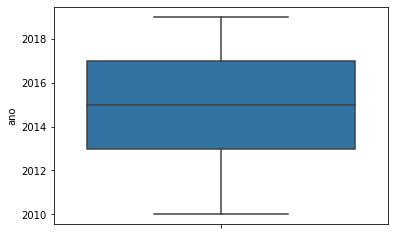

In [46]:
sns.boxplot(y = spotify["ano"])
plt.show()

In [ ]:
sns.boxplot(y = spotify["acustica"])
plt.show()
Q = spotify['acustica'].quantile([0.25, 0.5, 0.75])
print(Q)

In [ ]:
plt.figure(figsize=(40,20))
ax = sns.boxplot(y=spotify["dancabilidade"], x=spotify["genero"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, size=12)
plt.plot()

In [ ]:
spotify_subgrupo = pd.DataFrame(
    spotify[(
        (spotify['dancabilidade'] >=  20) 
        & (spotify['dancabilidade'] <= 40)
    )]
 )

fig = plt.figure(figsize=(20,6))

ax = sns.boxplot(x="genero", y="dancabilidade", data=spotify_subgrupo)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.plot()

In [ ]:
info_sobre_genero = spotify.groupby("genero").mean()
info_sobre_genero.head(2)

In [72]:
spotify_subgrupo2 = spotify.loc[
      (spotify['artista'] == 'Train') | (spotify['artista'] == 'Eminem') |
      (spotify['artista'] == 'Kasha') | (spotify['artista'] == 'Lady Gaga') |
      (spotify['artista'] == 'Bruno Mars') | (spotify['artista'] == 'Mark Ronson') |
      (spotify['artista'] == 'DJ Khaled') | (spotify['artista'] == 'Ed Sheeran') 
]

In [74]:
spotify_subgrupo2.head(2)

,titulo,artista,genero,ano,bpm,energia,dancabilidade,volume,liveness,positividade,duracoo,acustica,oralidade,popularidade
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82


In [ ]:
spotify_subgrupo2.artista.value_counts()

In [ ]:
spotify_subgrupo2.artista.value_counts().plot(kind = 'pie', title='Comparação dos artistas', figsize=(30,10))

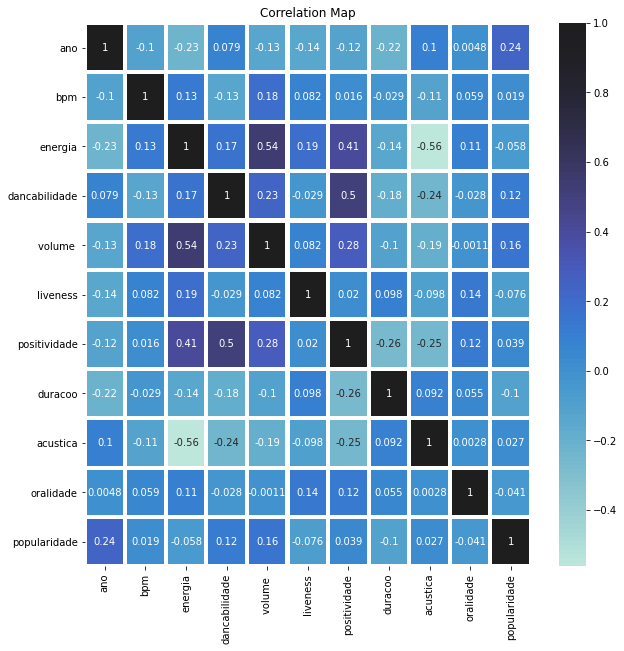

In [88]:
plt.figure(figsize=(10,10))
plt.title('Correlation Map')
ax=sns.heatmap(spotify.corr(),
               linewidth=3.1,
               annot=True,
               center=1)

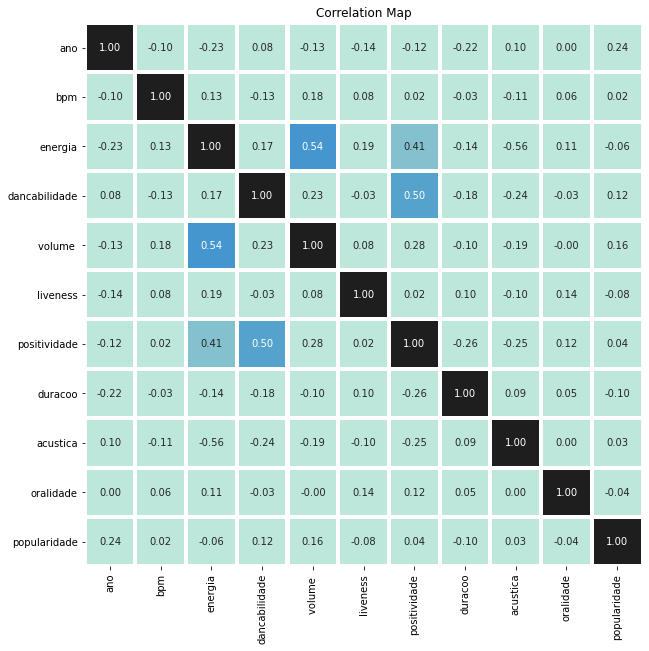

In [89]:
plt.figure(figsize=(10,10))
plt.title('Correlation Map')

ax=sns.heatmap(spotify.corr(),
               linewidth=3.1,
               annot=True,
               center=1,
               fmt=".2f",
               cbar=False,
               vmin=0.3)

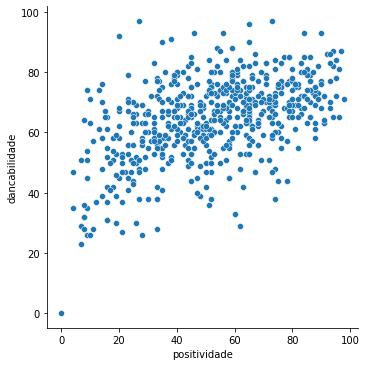

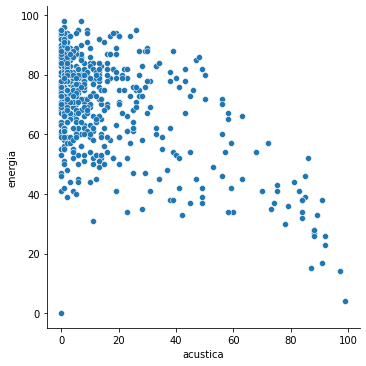

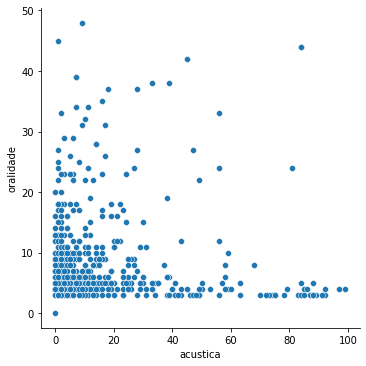

In [91]:
sns.relplot(x="positividade", y="dancabilidade", data=spotify);
plt.show()

sns.relplot(x="acustica", y="energia", data=spotify);
plt.show()

sns.relplot(x="acustica", y="oralidade", data=spotify);
plt.show()